Explore the application of k-means clustering in color compression of a color image. To explore it, read an image having multiple colors where a large number of colors will be unused, and many of the pixels in the image will have similar or even identical colors. Cluster these several colors into a 16 different clusters and show the compressed image.

In [22]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np

image1_url = "https://as2.ftcdn.net/v2/jpg/12/21/27/67/1000_F_1221276710_vdxKFMJM6JadO070JfDFmDTMW5v8zth4.jpg"
image2_url = "https://static1.srcdn.com/wordpress/wp-content/uploads/2016/09/Tom-and-Jerry.jpg"
response = requests.get(image1_url)
img = Image.open(BytesIO(response.content))

In [23]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

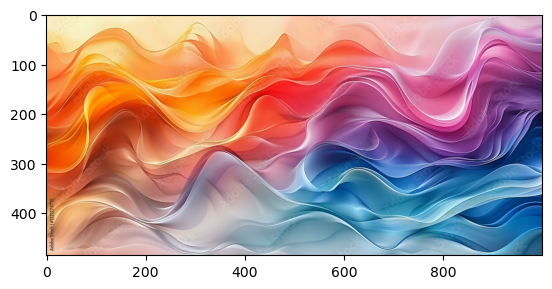

In [24]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [25]:
img_array = np.array(img)
print(img_array.shape)
data = img_array/255
data = data.reshape(-1, 3)
print(data.shape)

(485, 1000, 3)
(485000, 3)


In [26]:
from sklearn.cluster import KMeans
knn = KMeans(n_clusters=16)
knn.fit(data)
new_colors = knn.cluster_centers_[knn.predict(data)]

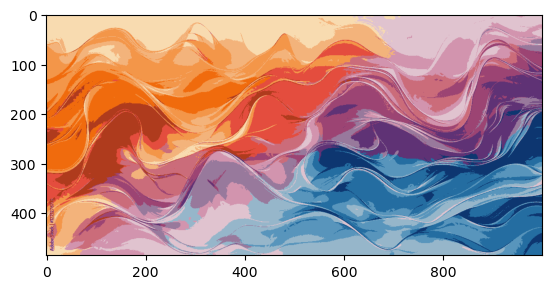

In [27]:
img_recolored = new_colors.reshape(img_array.shape)
plt.imshow(img_recolored)

In [18]:
Image.fromarray((img_recolored * 255).astype(np.uint8)).save("compressed_image.jpg")